In [2]:
from lensid.utils.ml_utils import *

2021-09-02 21:55:55.426342: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 21:55:55.426381: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
indir = 'test'
#df_dir = '../../data/dataframes/'
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/'

In [4]:
tag='_kaggle'
df_sky = pd.read_csv(df_dir+str(indir)+'/ML_sky.csv').drop(columns=['Unnamed: 0'])
df_qts = pd.read_csv(df_dir+str(indir)+'/ML_qts'+tag+'.csv').drop(columns=['Unnamed: 0'])

In [5]:
df_test=pd.merge(df_sky, df_qts, on=['img_0', 'img_1','Lensing','m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2'])
df_test['densnet_xgbsky_bayestar_mul_0'] = df_test['xgb_dense_QTS_0']*df_test['xgb_pred_bayestar_skymaps']
#df_test['densnet_xgbsky_pe_mul'] = df_test['xgb_dense_QTS']*df_test['xgb_pred_pe_skymaps']
df_test.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10,xgb_dense_QTS_0_fpp,"m1, m2_fpp",densnet_xgbsky_bayestar_mul_0
499787,539925500.000000000-79851,662411500.000000000-324823,0,0.064115,0.000517,0.007136,0.131712,2.621429e-104,2.094243e-178,7.060003e-82,...,0.000125,0.000085,0.000074,0.000111,0.000038,0.000187,0.000078,0.795956,0.975932,3.232512e-10
499788,513045000.000000000-26090,645946500.000000000-291893,0,0.376344,0.003034,0.110852,0.130537,1.845847e-96,1.898632e-140,2.471768e-246,...,0.000007,0.000004,0.000008,0.000016,0.000043,0.000007,0.000004,0.974769,0.975932,2.190271e-11
499789,574757500.000000000-149515,581965500.000000000-163931,0,0.029113,0.000235,0.011322,0.120512,3.533129e-01,9.453799e-01,9.065842e-01,...,0.000029,0.000469,0.000693,0.000225,0.000708,0.000333,0.000300,0.665672,0.457564,1.522533e-09
499790,626319000.000000000-252638,510473500.000000000-20947,0,1.328564,0.010712,0.239242,0.132966,2.017116e-01,4.702509e-01,5.903431e-01,...,0.000333,0.000573,0.000425,0.000645,0.000201,0.000277,0.000210,0.702655,0.486205,3.022497e-08
499791,513984500.000000000-27969,644989500.000000000-289979,0,0.345810,0.002788,0.029475,0.297573,0.000000e+00,0.000000e+00,0.000000e+00,...,0.001194,0.000227,0.000579,0.002100,0.001279,0.000735,0.000777,0.557763,0.975932,2.069726e-09


In [6]:
df_test.columns

Index(['img_0', 'img_1', 'Lensing', 'bayestar_skymaps_blu',
       'bayestar_skymaps_d2', 'bayestar_skymaps_d3', 'bayestar_skymaps_lsq',
       'm1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2', 'xgb_pred_bayestar_skymaps',
       'xgb_pred_bayestar_skymaps_1', 'xgb_pred_bayestar_skymaps_2',
       'xgb_pred_bayestar_skymaps_3', 'xgb_pred_bayestar_skymaps_4',
       'xgb_pred_bayestar_skymaps_5', 'xgb_pred_bayestar_skymaps_6',
       'xgb_pred_bayestar_skymaps_7', 'xgb_pred_bayestar_skymaps_8',
       'xgb_pred_bayestar_skymaps_9', 'xgb_pred_bayestar_skymaps_10',
       'xgb_pred_bayestar_skymaps_fpp', 'ra, sin_dec_fpp', 'dense_H1_0',
       'mean_overlap_qts_H1', 'std_overlap_qts_H1', 'lsq_overlap_qts_H1',
       'dense_L1_0', 'mean_overlap_qts_L1', 'std_overlap_qts_L1',
       'lsq_overlap_qts_L1', 'dense_V1_0', 'me

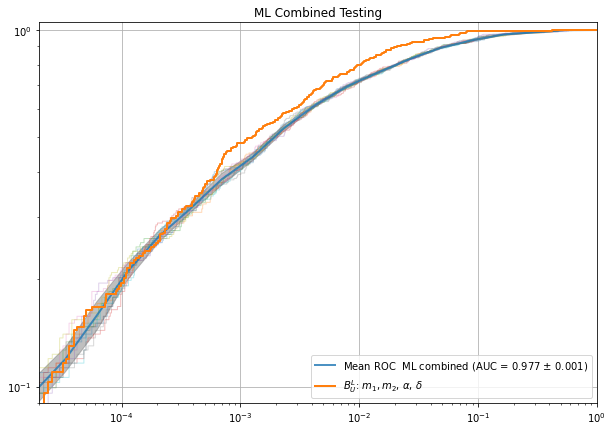

In [7]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,7)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()

for i in range(1,11):
    df_test['densnet_xgbsky_bayestar_mul_'+str(i)] = df_test['xgb_dense_QTS_'+str(i)]*df_test['xgb_pred_bayestar_skymaps_'+str(i)]

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test.Lensing.values, df_test['densnet_xgbsky_bayestar_mul_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC  ML combined (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['m1, m2, ra, sin_dec']
labels=[r'$B^L_U$: $m_1,m_2$, $\alpha$, $\delta$']
for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test.Lensing.values, df_test[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=2)

ax.set(xlim=[2e-5,1],ylim=[9e-2,1.05],title = "ML Combined Testing",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
plt.savefig('plots/ROC-log-combined'+tag+'.png')

plt.show()


In [8]:
df_test.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,densnet_xgbsky_bayestar_mul_1,densnet_xgbsky_bayestar_mul_2,densnet_xgbsky_bayestar_mul_3,densnet_xgbsky_bayestar_mul_4,densnet_xgbsky_bayestar_mul_5,densnet_xgbsky_bayestar_mul_6,densnet_xgbsky_bayestar_mul_7,densnet_xgbsky_bayestar_mul_8,densnet_xgbsky_bayestar_mul_9,densnet_xgbsky_bayestar_mul_10
499787,539925500.000000000-79851,662411500.000000000-324823,0,0.064115,0.000517,0.007136,0.131712,2.621429e-104,2.094243e-178,7.060003e-82,...,8.499793e-10,4.170470e-10,6.879792e-10,6.029753e-10,3.616795e-10,3.779759e-10,5.292539e-10,1.812789e-10,9.139579e-10,3.496748e-10
499788,513045000.000000000-26090,645946500.000000000-291893,0,0.376344,0.003034,0.110852,0.130537,1.845847e-96,1.898632e-140,2.471768e-246,...,2.467286e-10,4.978180e-11,1.529659e-10,3.230531e-11,1.962000e-11,4.531512e-11,9.617056e-11,2.337999e-10,4.229399e-11,2.071921e-11
499789,574757500.000000000-149515,581965500.000000000-163931,0,0.029113,0.000235,0.011322,0.120512,3.533129e-01,9.453799e-01,9.065842e-01,...,6.877477e-09,5.876286e-09,2.544957e-09,1.675045e-10,2.792665e-09,6.390429e-09,1.695203e-09,5.137408e-09,2.147725e-09,1.937540e-09
499790,626319000.000000000-252638,510473500.000000000-20947,0,1.328564,0.010712,0.239242,0.132966,2.017116e-01,4.702509e-01,5.903431e-01,...,4.686384e-08,4.008795e-08,2.182704e-08,3.848305e-08,6.573649e-08,4.791594e-08,6.478473e-08,2.296256e-08,2.387082e-08,2.180934e-08
499791,513984500.000000000-27969,644989500.000000000-289979,0,0.345810,0.002788,0.029475,0.297573,0.000000e+00,0.000000e+00,0.000000e+00,...,5.157377e-09,2.370799e-09,5.035823e-09,3.220672e-09,5.738465e-10,2.093705e-09,7.115632e-09,5.092986e-09,2.864365e-09,3.328437e-09


In [9]:
df_test.to_csv(df_dir+str(indir)+'/ML_combined'+tag+'.csv')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


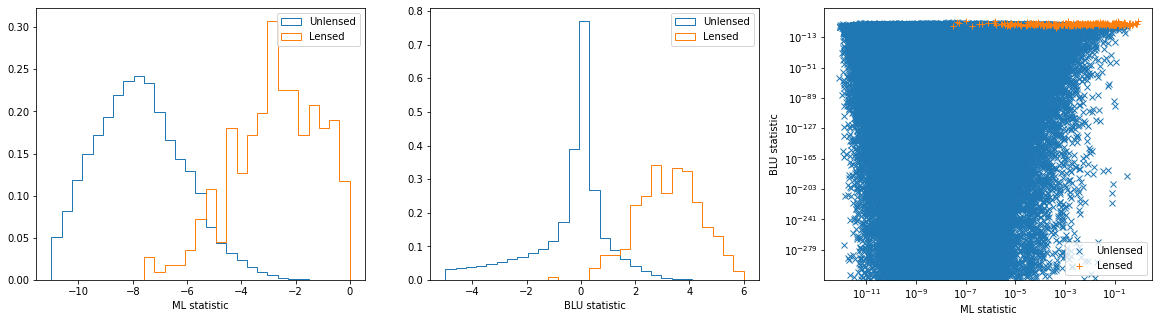

In [10]:
ml_stat='densnet_xgbsky_bayestar_mul_0'
blu_stat= 'm1, m2, ra, sin_dec'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-11,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-5,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


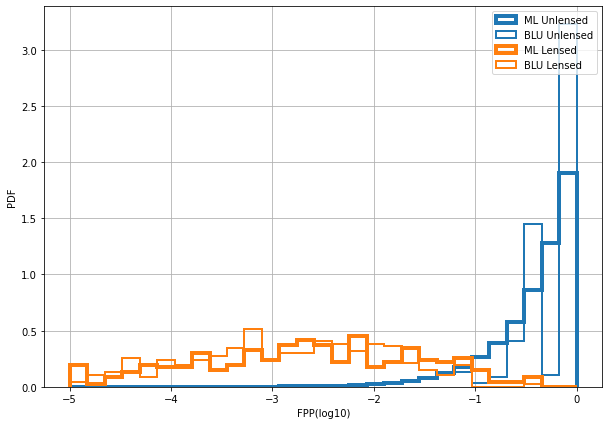

In [11]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML bayestar sky x ML QTs auc = 0.9800
$B^L_U$ auc = 0.9909


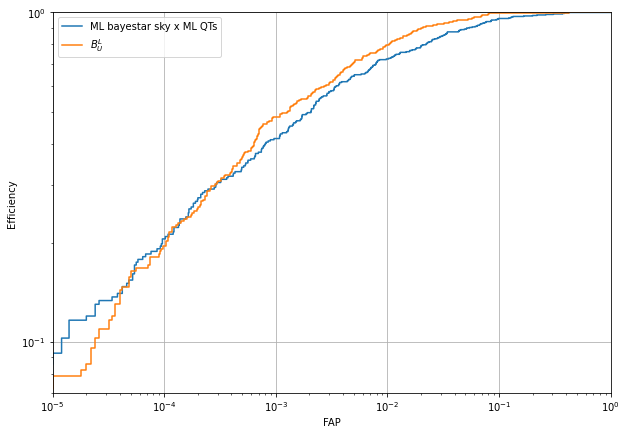

In [12]:
fig,rocs=plot_ROCs(df_test,cols=['densnet_xgbsky_bayestar_mul_0','m1, m2, ra, sin_dec'],labels =['ML bayestar sky x ML QTs','$B^L_U$'],logy=True,ylim=7e-2)

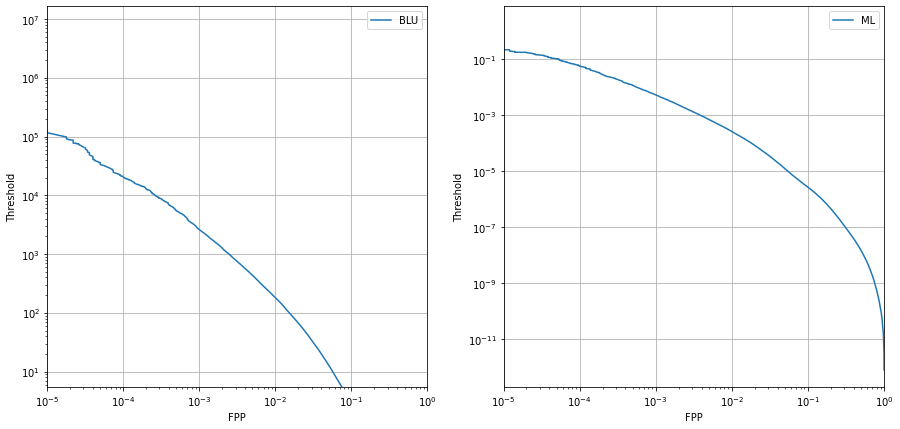

In [13]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [14]:
df_test.to_csv(df_dir+str(indir)+'/ML_combined'+tag+'.csv')